<a href="https://colab.research.google.com/github/ealsk/Undergrad-DeepLearning-20Fall/blob/master/04_2_num_diff_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [3]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=0)

**일단 함수 그려보기**

In [5]:
x0 = np.arange(-2, 2, 0.25)
x1 = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(x0, x1)
print(X.shape, Y.shape)

nrows = X.shape[0]
ncols = X.shape[1]

(16, 16) (16, 16)


In [6]:
Xf = X.flatten()
Yf = Y.flatten()
arr = np.array([Xf, Yf])

print(Xf.shape, Yf.shape)
print(arr.shape, arr.ndim)

(256,) (256,)
(2, 256) 2


In [7]:
Z = function_2(arr)
print(Z.shape)

(256,)


그림을 그리기 위한 reshape 1차원 -> 2차원

In [8]:
Z = np.reshape(Z, (nrows, ncols))
print(X.shape, Y.shape, Z.shape)

(16, 16) (16, 16) (16, 16)


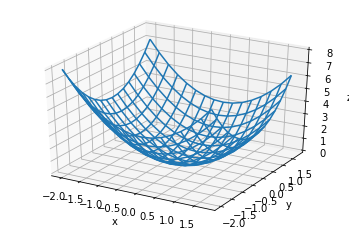

In [9]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

**3차원 곡면의 한 점에서의 기울기 구해보기**

In [27]:
def numerical_gradient_single_point(f,x, verbose=False):
    h = 1e-4
    grad = np.zeros_like(x)
    print('x.size={}'.format(x.size))

    for idx in range(x.size):
        v_keep = x[idx]

        x[idx] = float(v_keep) + h
        fxh1 = f(x)
        if verbose: 
            print(x, '-->', fxh1)

        x[idx] = float(v_keep) - h
        fxh2 = f(x)
        if verbose: 
            print(x, '-->', fxh2)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = v_keep

        if verbose: 
            print( 'grad [{}] = {}'. format (idx, grad [idx]))
            print()


    return grad

In [29]:
numerical_gradient_single_point(function_2, np.array ([3.0, 4.0]), verbose=True)

x.size=2
[3.0001 4.    ] --> 25.00060001
[2.9999 4.    ] --> 24.99940001
grad [0] = 6.00000000000378

[3.     4.0001] --> 25.00080001
[3.     3.9999] --> 24.99920001
grad [1] = 7.999999999999119



array([6., 8.])

In [30]:
numerical_gradient_single_point(function_2, np.array ([1.0, 3.0]), verbose=True)

x.size=2
[1.0001 3.    ] --> 10.00020001
[0.9999 3.    ] --> 9.99980001
grad [0] = 2.0000000000042206

[1.     3.0001] --> 10.000600010000001
[1.     2.9999] --> 9.999400009999999
grad [1] = 6.000000000012662



array([2., 6.])

In [20]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)

            return grad

In [21]:
grad = numerical_gradient(function_2, arr)
print(grad.shape)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 -0.5    -0.25    0.      0.25    0.5     0.75    1.      1.25    1.5
  1.75   -2.     -1.75   -1.5    -1.25   -1.     -0.75   -0.5    -0.25
  0.      0.25    0.5     0.75    1.      1.25    1.5     1.75   -2.
 -1.75   -1.5    -1.25   -1.     -0.75   -0.5    -0.25    0.      0.25
  0.5     0.75    1.      1.25    1.5     1.75   -2.     -1.75   -1.5
 -1.25   -1.     -0.75   -0.5    -0.25    0.      0.25    0.5     0.75
  1.      1.25    1.5     1.75  ] --> 344.00035001000003
[-2.     -1.75   -1.5    -1.25   -1.     -0.75   -0.5    -0.25    0.
  0.25    0.5     0.75    1.      1.25    1.5     1.75   -2.     -1.75
 -1.5    -1.25   -1.     -0.75   -0.5    -0.25    0.      0.25    0.5
  0.75    1.      1.25    1.5     1.75   -2.     -1.75   -1.5    -1.25
 -1.     -0.75   -0.5    -0.25    0.      0.25    0.5     0.75    1.
  1.25    1.5     1.75   -2.     -1.75   -1.5    -1.25   -1.     -0.75
 -0.5    -0.25    0.      0.25    0.5     0.75    1.      1.25  

In [22]:
X.shape, Y.shape, grad.shape

((16, 16), (16, 16), (2, 256))

**기울기(Gradient) 그려보기**

In [33]:
print(arr.shape, arr.size, arr.ndim)

(2, 256) 512 2


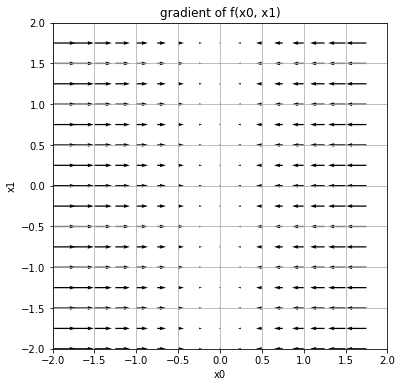

In [34]:
plt.figure(figsize=(6,6))
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.title('gradient of f(x0, x1)')
plt.show()